# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Library to split data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library - !pip install xgboost 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

## Data Overview

- Observations
- Sanity checks

In [ ]:
#mounting google colab drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/University Of Texas/Ensemble Techniques/EasyVisa.csv')


In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.shape

(25480, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


I'll use year as categorical feature, so will convert it too

In [ ]:
df['yr_of_estab'] = pd.Categorical(df['yr_of_estab'])

Inserting levels at Education

In [ ]:
df['education_of_employee'].unique()

['High School', 'Master's', 'Bachelor's', 'Doctorate']
Categories (4, object): ['Bachelor's', 'Doctorate', 'High School', 'Master's']

In [ ]:
df['education_of_employee'] = pd.Categorical(df['education_of_employee'], categories=["High School", "Bachelor's", "Master's", "Doctorate"], ordered=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  category
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(10), float64(1), int64(1)
memory usage: 1.9 MB


In [ ]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

No null values in the dataset

In [ ]:
df.duplicated().sum()

0

No duplicated rows in the dataset

In [ ]:
for feature in df.columns:
    if df[feature].dtype == 'category':
        print(df[feature].value_counts())
        print('--------------------------')

EZYV01       1
EZYV25287    1
EZYV25285    1
EZYV25284    1
EZYV25283    1
            ..
EZYV17633    1
EZYV17632    1
EZYV17631    1
EZYV17630    1
EZYV9999     1
Name: case_id, Length: 25480, dtype: int64
--------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------
1998    1134
2005    1051
2001    1017
2007     994
1999     870
        ... 
1807       6
1822       4
1846       4
1810       3
1824       2
Name: yr_of_estab, Length: 199, dtype: int64
--------------------------
Northeast    7195
South

In [ ]:
len(df['yr_of_estab'].unique())

199

I'll transform this variable in smaller categories to reduce model complexity

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


Insights:

* `no_of_employees` is left skewed. Much different from the Q3 to the max point of the data, that makes the average much higher than the median
* `prevailing_wage` has an "invalid" distribution because it has `unit_of_wage` to be counted

In [ ]:
df.describe(include = 'category').T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
yr_of_estab,25480,199,1998,1134
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


Insights:

* Most of the visa candidates comes from Asia
* Most of the candidates have job experience
* The most commom `region_of_employment` is Northeast
* Most visa requests gets approved

In [ ]:
#droping the id column

df.drop('case_id', axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

###Univariate Analysis

In [ ]:
cat = ['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training',
       'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status', 'yr_of_estab']


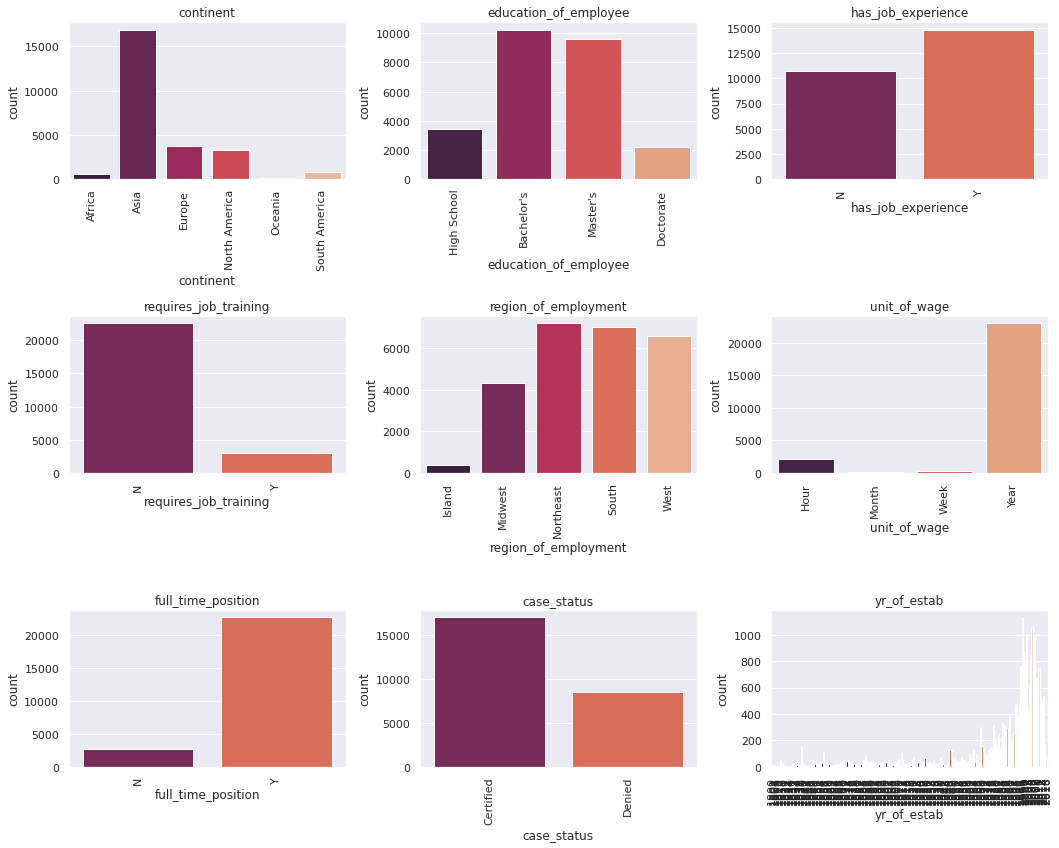

In [ ]:
#Ploting a countplot for all categorical features

plt.figure(figsize=(15,15))

for i,column in enumerate(cat):
  plt.subplot(4, 3, i + 1)
  sns.countplot(data=df, x=df[column], palette='rocket')
  plt.tight_layout()
  plt.title(column)
  plt.xticks(rotation=90)

plt.show()

Insights:

* Most of the candidates of the visa are from Asia
* Bachelor's and Master's are the most common observations regarding `education_of_employee`
* Almost 90% of all observations have `unit_of_wage` as Year
* It's an imbalanced dataset when looking at the `case_status`, but `full_time_position` and `requires_job_training` is even more imbalanced.
* `yr_of_estab` has a wide range. As mentioned before, will transform in smaller categories

In [ ]:
num = ['no_of_employees', 'prevailing_wage']

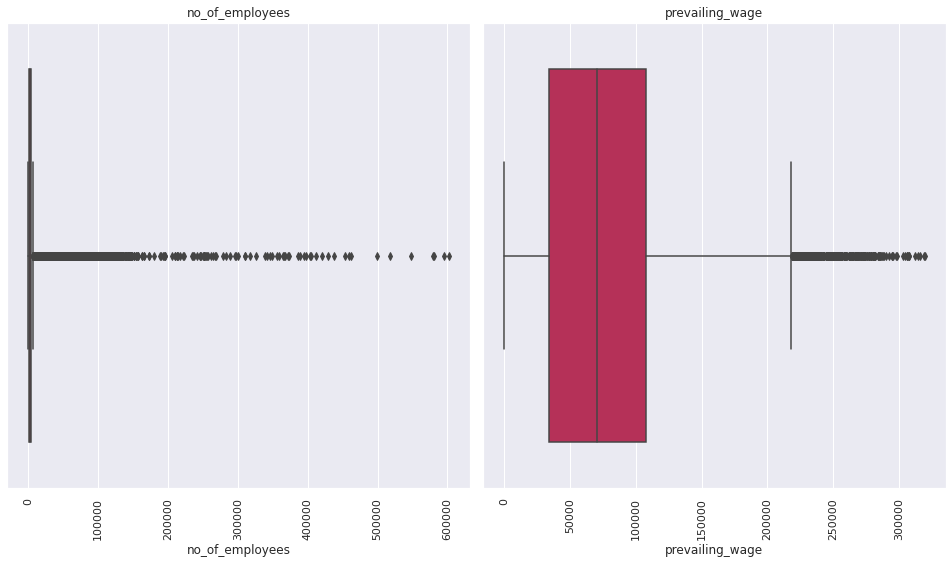

In [ ]:
#Ploting a boxplot for all numerical features

plt.figure(figsize=(20,8))

for i,column in enumerate(num):
  plt.subplot(1, 3, i + 1)
  sns.boxplot(data=df, x=df[column], palette='rocket')
  plt.tight_layout()
  plt.title(column)
  plt.xticks(rotation=90)

plt.show()

Insights:

* `no_of_employees` is highly skewed. Have a lot of outliers which means that there's a lot of presence of big companies
* `prevailing_wage` is hard to read because there's "noise" in the information that come from the day, week, month `unit_of_prevailing` column

###Bivariate Analysis

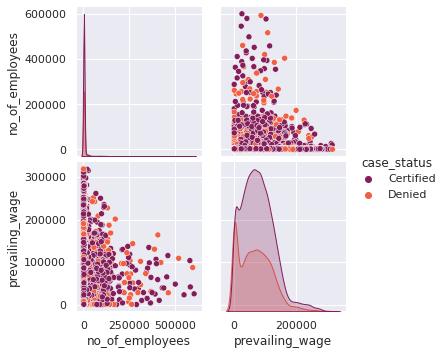

In [ ]:
sns.pairplot(df, hue='case_status', palette='rocket');

Couldn't identify any relation between `prevailing_wage` and `case_status`

Identifying relations between X and Y variables (that haven't been covered in the business questions)

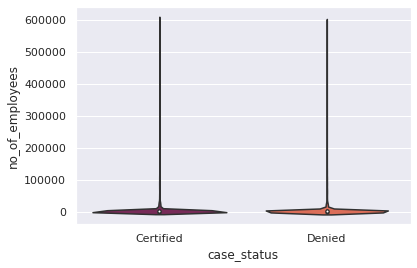

In [ ]:
sns.violinplot(data=df, x='case_status', y='no_of_employees', palette='rocket');

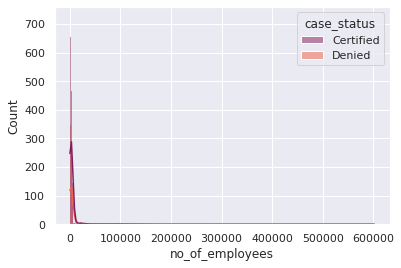

In [ ]:
sns.histplot(x=df['no_of_employees'], hue=df['case_status'], kde=True, palette='rocket');

Insights:

* Too much of imbalance to identify any relation. Still the violinplots pretty much look the same

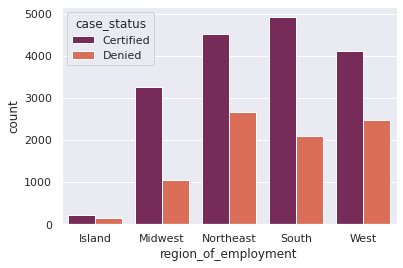

In [ ]:
sns.countplot(data=df, hue='case_status', x='region_of_employment', palette='rocket');

Insights:

* South is the region that, in proportion, has most certifies. Northeast and West have similar proportion
* The highest denial region is Northeast (not counting Island because too low candidates)

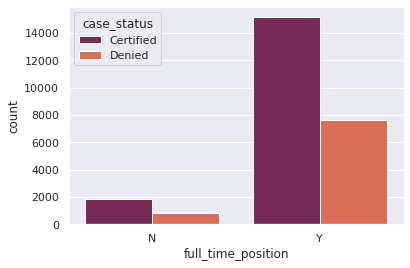

In [ ]:
sns.countplot(data=df, hue='case_status', x='full_time_position', palette='rocket');

Insights:

* Imbalanced dataset by this perspective
* Can't find any pattern here, both full time or not same denial rate

Other variables will be explored in the next session

###Business Questions

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

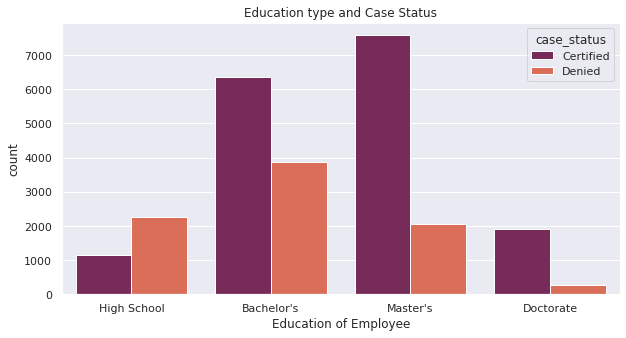

In [ ]:
plt.figure(figsize=(10,5))

sns.countplot(data=df, hue='case_status', x='education_of_employee', palette='rocket');
plt.xlabel('Education of Employee');
plt.title('Education type and Case Status');

We can see that the higher the education level lower the amount of denials in proportion

2. How does the visa status vary across different continents? 


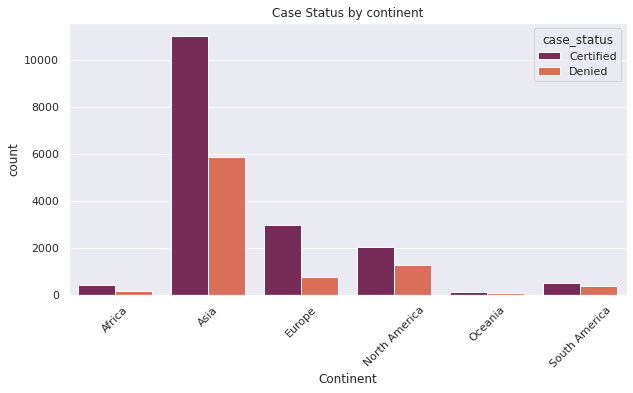

In [ ]:
plt.figure(figsize=(10,5))

sns.countplot(data=df, hue='case_status', x='continent', palette='rocket');
plt.xlabel('Continent');
plt.title('Case Status by continent');
plt.xticks(rotation=45);

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

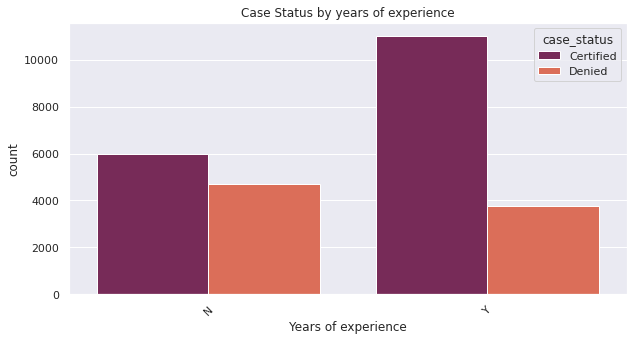

In [ ]:
plt.figure(figsize=(10,5))

sns.countplot(data=df, hue='case_status', x='has_job_experience', palette='rocket');
plt.xlabel('Years of experience');
plt.title('Case Status by years of experience');
plt.xticks(rotation=45);

Insights:

* We can see that there's an influence of `has_job_experience` in the `case_status` variable. If the employee has job experience the chances of get certified are bigger

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

In [ ]:
#checking if there's a way to identify USA into the continents

df['continent'].unique()

['Asia', 'Africa', 'North America', 'Europe', 'South America', 'Oceania']
Categories (6, object): ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

I'll assume Nort America as USA even though there might be other countries.

In [ ]:
df_usa = df[df['continent'] == 'North America']
df_usa.sample(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
22296,North America,Master's,N,N,3714,1965,Northeast,71753.6400,Year,N,Certified
4972,North America,High School,Y,N,1736,1857,West,71666.5000,Year,N,Certified
24168,North America,High School,N,N,6102,2014,Northeast,487.6331,Hour,Y,Denied
19210,North America,Master's,N,N,317,1997,Northeast,97368.5200,Week,Y,Denied
4129,North America,Master's,N,Y,2183,1994,South,140866.4300,Year,Y,Denied
22149,North America,Bachelor's,Y,N,1372,2006,West,22108.0000,Year,Y,Certified
14124,North America,Bachelor's,Y,Y,1354,1935,West,82019.4500,Year,Y,Certified
17083,North America,Bachelor's,Y,N,1324,1985,West,371.0813,Hour,Y,Denied
4706,North America,Master's,Y,N,1198,1981,Northeast,11816.9800,Year,Y,Certified
21851,North America,Bachelor's,Y,N,2953,2006,West,22810.3700,Year,Y,Denied


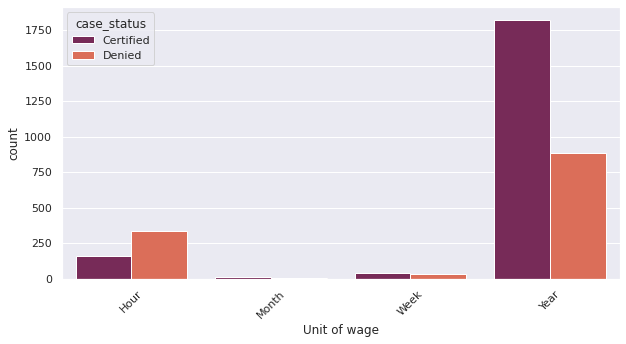

In [ ]:
plt.figure(figsize=(10,5))

sns.countplot(data=df_usa, hue='case_status', x='unit_of_wage', palette='rocket');
plt.xlabel('Unit of wage');
plt.title('');
plt.xticks(rotation=45);

Insights:

* Yearly wages tend to have more approvals which is the expected once this is an imbalanced dataset with more approvals than denials. 
* The opposite happens with Hour unit. That unit has more denials in proportion than the other units

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

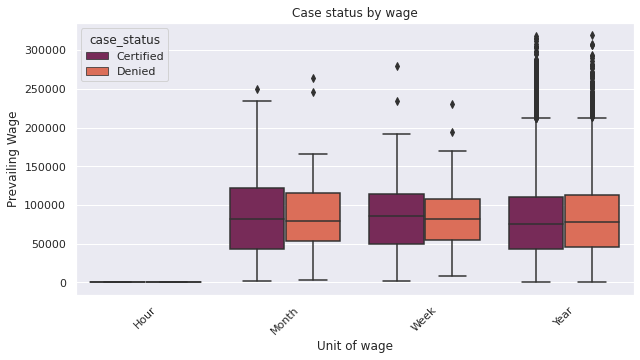

In [ ]:
plt.figure(figsize=(10,5))

sns.boxplot(data=df, hue='case_status', x='unit_of_wage', y='prevailing_wage', palette='rocket');
plt.xlabel('Unit of wage');
plt.ylabel('Prevailing Wage')
plt.title('Case status by wage');
plt.xticks(rotation=45);

Insights:

* The only way to properly look at wage is combining both unit and prevailing features
* Focusing on the Year wages (which correspond to almost 90% of the USA dataset) i'd say that there's no difference in the `prevailing_wages` between the approved cases and the denied cases

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [ ]:
df['yr_of_estab'] = df['yr_of_estab'].astype(int) 

In [ ]:
bins = [1800,1950,2000,2100]
labels = ['1800-1950','1951-2000','>2001']

df['yr_of_estab'] = pd.cut(df['yr_of_estab'], bins=bins, labels=labels, right=True )

In [ ]:
df['yr_of_estab'] =  pd.Categorical(df['yr_of_estab'], categories=['1800-1950','1951-2000','>2001'], ordered=True)

In [ ]:
df.sample(5)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
18761,Asia,Master's,Y,N,3755,>2001,South,40.1191,Hour,Y,Denied
584,Asia,High School,N,Y,940,>2001,South,75815.3900,Year,Y,Certified
22989,South America,High School,Y,N,2955,1800-1950,South,412.4337,Hour,Y,Certified
22044,Asia,Master's,Y,N,35124,1951-2000,Northeast,6818.2700,Year,Y,Certified
10149,South America,High School,Y,N,3673,1951-2000,Midwest,34574.2500,Year,Y,Denied


## EDA

- It is a good idea to explore the data once again after manipulating it.

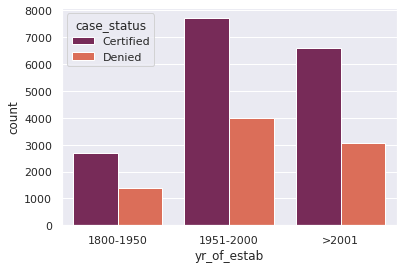

In [ ]:
sns.countplot(data=df, x='yr_of_estab', hue='case_status', palette='rocket');

Insights:

* The older companies, 1800 to 1950, have much less observations than the newer companies. 
* In proportion the older companies have more denied cases than the newer companies

#Model Developing: Bagging and Boosting

##Pre processing

In [ ]:
#transforming y variable into 0 or 1

df['case_status'] = df['case_status'].apply(lambda x : 1 if x=='Denied' else 0)


In [ ]:
X = df.drop(['case_status'],axis=1)
y = df['case_status']

X = pd.get_dummies(X,drop_first=True)

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17836, 22) (7644, 22)


In [ ]:
y.value_counts(1)

0    0.667896
1    0.332104
Name: case_status, dtype: float64

In [ ]:
y_test.value_counts(1)

0    0.667844
1    0.332156
Name: case_status, dtype: float64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   no_of_employees                   25480 non-null  int64  
 1   prevailing_wage                   25480 non-null  float64
 2   continent_Asia                    25480 non-null  uint8  
 3   continent_Europe                  25480 non-null  uint8  
 4   continent_North America           25480 non-null  uint8  
 5   continent_Oceania                 25480 non-null  uint8  
 6   continent_South America           25480 non-null  uint8  
 7   education_of_employee_Bachelor's  25480 non-null  uint8  
 8   education_of_employee_Master's    25480 non-null  uint8  
 9   education_of_employee_Doctorate   25480 non-null  uint8  
 10  has_job_experience_Y              25480 non-null  uint8  
 11  requires_job_training_Y           25480 non-null  uint8  
 12  yr_o

**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

##Bagging Models

##Decision Tree

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.67,1:0.33},random_state=1)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

In [ ]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.662611  0.512013   0.492424  0.502027


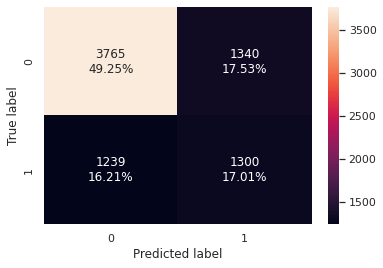

In [ ]:
confusion_matrix_sklearn(dtree, X_test, y_test)

The tree has overfited and is not able to generalize well considering the training data

##Decision Tree Tunning

In [ ]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.67,1:0.33},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=6,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

In [ ]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.724209  0.290225   0.706245  0.411392
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.721088  0.283182   0.697381  0.402801


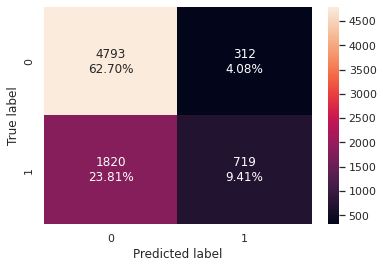

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

The tunning made the model predict everything as 1 in order to improve recall. It does not have the ability to generalize the data

##Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999944  0.999831        1.0  0.999916
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.716641  0.481686   0.589966  0.530356


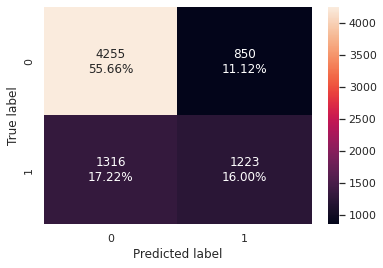

In [ ]:
confusion_matrix_sklearn(rf,X_test,y_test)

The model overfited and is not able to generalize well on the training data

##Random Forest with Class Weight

In [ ]:
rf_wt = RandomForestClassifier(class_weight={0:0.67,1:0.33}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

In [ ]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999944  0.999831        1.0  0.999916
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.721088  0.501772   0.595049  0.544444


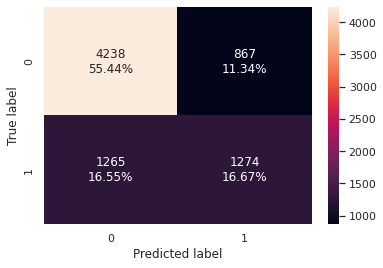

In [ ]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

The model has overfited and is not able to generalize into the training data

##Random Forest Tunning

In [ ]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [50,100,150],
        "min_samples_leaf": np.arange(1, 4,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features=0.9, max_samples=0.7, min_samples_leaf=3,
                       random_state=1)

In [ ]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.886073  0.740503   0.898586  0.811922
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.741889  0.513982   0.638454  0.569496


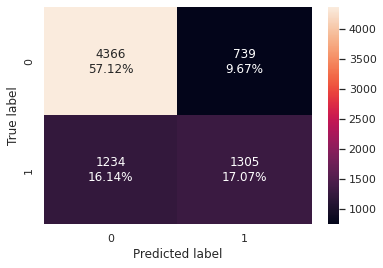

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

The model has probably overfited the training data and presented low Recall

## Bagging

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

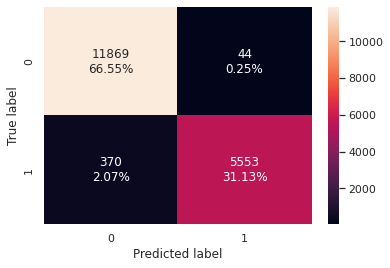

In [ ]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [ ]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.976789  0.937532   0.992139  0.964063


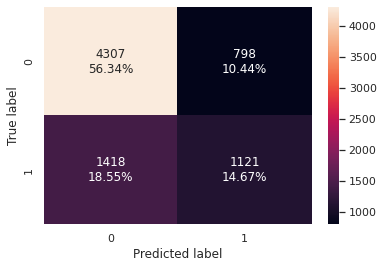

In [ ]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [ ]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.710099  0.441512   0.584158  0.502916


* Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of recall.

##  Bagging Weighted

In [ ]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.67,1:0.33},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  random_state=1)

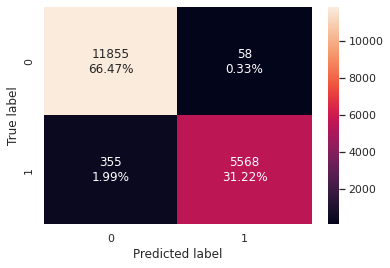

In [ ]:
confusion_matrix_sklearn(bagging_wt,X_train,y_train)

In [ ]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.976845  0.940064   0.989691  0.964239


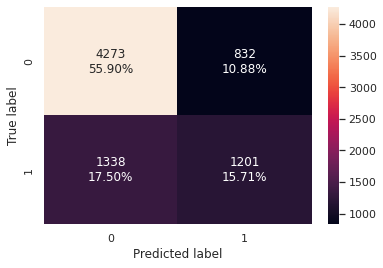

In [ ]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [ ]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.716117  0.473021   0.590753  0.525372


* Bagging classifier with a weighted decision tree has also overfited and it's not able to generalize well on the test data

## Bagging Tuning


In [ ]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.7, n_estimators=30,
                  random_state=1)

   Accuracy    Recall  Precision        F1
0  0.980657  0.946817   0.994679  0.970158
   Accuracy    Recall  Precision        F1
0  0.723312  0.422607   0.623113  0.503638


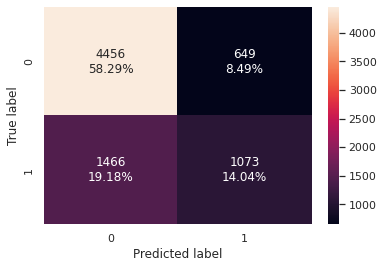

In [ ]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

The model has overfited the training data and wasn't able to generalize on test data

# Building boosting models

##AdaBoost

   Accuracy    Recall  Precision        F1
0   0.73688  0.429343   0.659492  0.520094
   Accuracy    Recall  Precision        F1
0   0.73247  0.416699   0.652281  0.508532


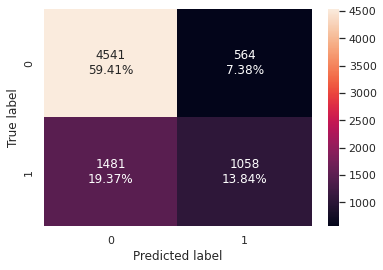

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

The model hasn't overfited but is not able to generalize well and recall is too low

##Adaboost Tuning

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": [10,30,100],
    "learning_rate":[0.05, 0.1,0.2]
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.2, n_estimators=100, random_state=1)

   Accuracy    Recall  Precision        F1
0  0.758858  0.526422   0.675769  0.591819
   Accuracy    Recall  Precision        F1
0  0.745421  0.497834    0.65323  0.565042


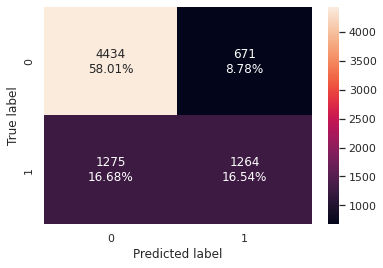

In [ ]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

A little better that then untuned model, hasn't overfited, but still low Recall and Precision

##Gradient Boost

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.750449  0.514098   0.659376  0.577744
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.751177  0.511619   0.662417  0.577333


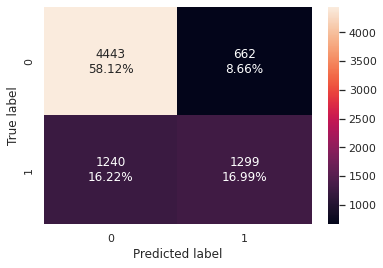

In [ ]:
#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

The model has not overfitted presents low 
Recall and considerably good Precision

##Gradient Boost Tuning

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=200, random_state=1,
                           subsample=1)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.757064  0.524734   0.671855  0.58925
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.749346  0.510043   0.658363  0.574789


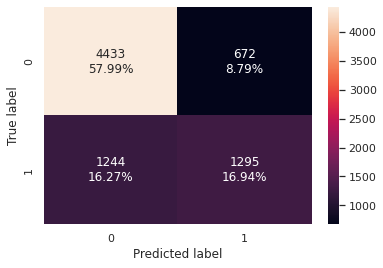

In [ ]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

Pretty much same results as untuned model

##Gradiant Boosting init=Adaboost

**Let's try using AdaBoost classifier as the estimator for initial predictions**

In [ ]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.749944  0.511565   0.659126  0.576046
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.749869  0.505711   0.661515  0.573214


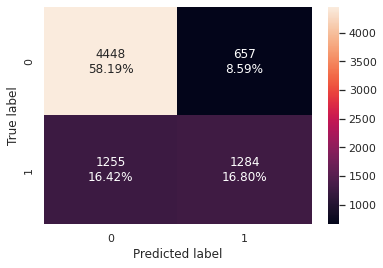

In [ ]:
#Calculating different metrics
gbc_init_model_train_perf=model_performance_classification_sklearn(gbc_init,X_train,y_train)
print("Training performance:\n",gbc_init_model_train_perf)
gbc_init_model_test_perf=model_performance_classification_sklearn(gbc_init,X_test,y_test)
print("Testing performance:\n",gbc_init_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_init,X_test,y_test)

Adaboost still presenting same results

##XGB Classifier

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)



XGBClassifier(eval_metric='logloss', random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.748654  0.510214   0.656386  0.574143
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.750262  0.508074   0.661538  0.574738


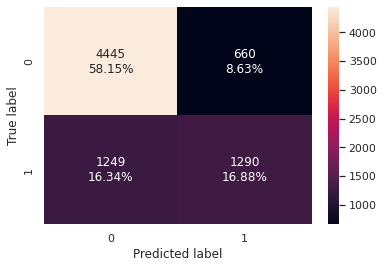

In [ ]:
#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

Close results to Gradient boosting (which makes sense) but still presents low Recall rate

##XGB Tuning

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.7, colsample_bytree=0.7,
              eval_metric='logloss', learning_rate=0.2, n_estimators=50,
              random_state=1, scale_pos_weight=2)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.712043  0.710282   0.551593  0.620959
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.714417  0.714061   0.554434  0.624204


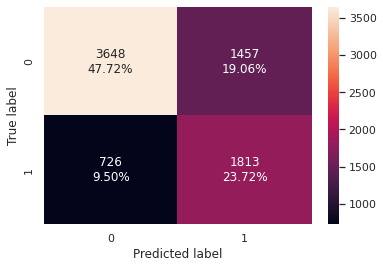

In [ ]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

We've got to improve the Recall but losing Precision. Still it's a tradeoff I'm willing to do.

##Stacking Model

In [ ]:
estimators = [('Random Forest',rf_estimator), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_features=0.9,
                                                       max_samples=0.7,
                                                       min_samples_leaf=3,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.67,
                                                                     1: 0.3

Training performance:
    Accuracy    Recall  Precision        F1
0  0.788181  0.751815    0.65863  0.702144
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.732601  0.664435   0.585967  0.622739


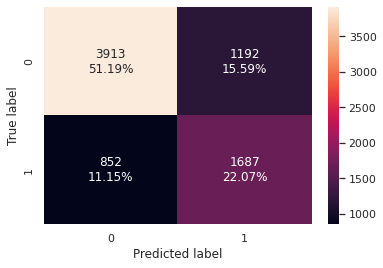

In [ ]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

##Feature Importance of Randon Forest

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                       Imp
prevailing_wage                   0.350255
no_of_employees                   0.324581
education_of_employee_Master's    0.052316
has_job_experience_Y              0.043868
education_of_employee_Bachelor's  0.031835
education_of_employee_Doctorate   0.029687
yr_of_estab_1951-2000             0.016201
unit_of_wage_Year                 0.016105
requires_job_training_Y           0.016004
full_time_position_Y              0.015814
yr_of_estab_>2001                 0.015229
continent_Europe                  0.012834
continent_Asia                    0.012231
region_of_employment_West         0.010437
region_of_employment_South        0.010269
region_of_employment_Midwest      0.010160
region_of_employment_Northeast    0.010126
continent_North America           0.010043
continent_South America           0.006013
continent_Oceania                 0.002471
unit_of_wage_Week                 0.002195
unit_of_wage_Month                0.001327


In [ ]:
feature_names = X_train.columns

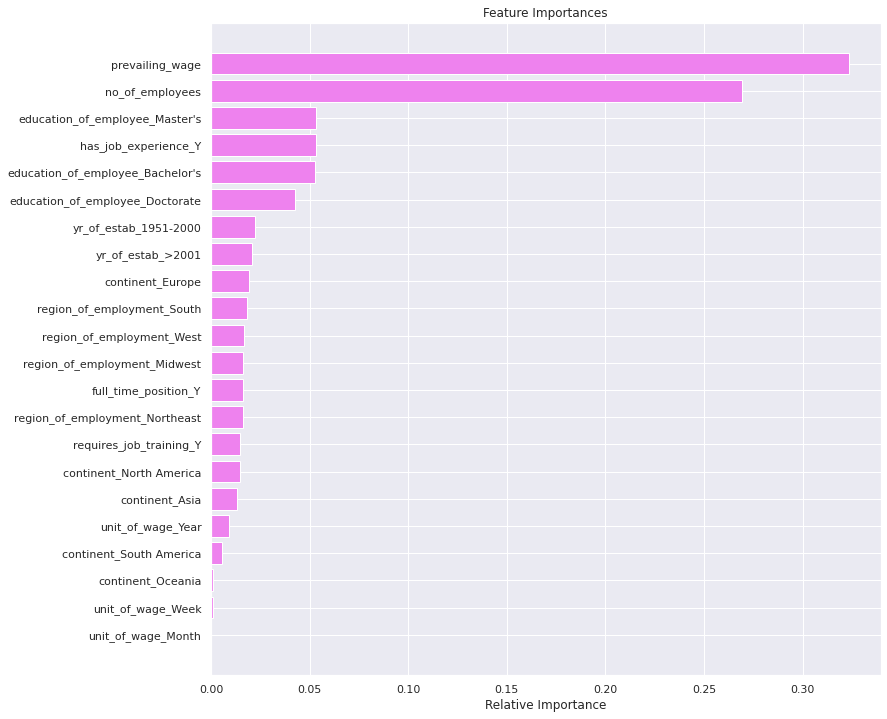

In [ ]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T, dtree_estimator_model_train_perf.T, rf_model_train_perf.T, rf_estimator_model_train_perf.T, rf_wt_model_train_perf.T ,bagging_model_train_perf.T,bagging_wt_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,
     ab_classifier_model_train_perf.T, abc_tuned_model_train_perf.T, gb_classifier_model_train_perf.T,
     gbc_tuned_model_train_perf.T,gbc_init_model_train_perf.T,xgb_classifier_model_train_perf.T,
     xgb_tuned_model_train_perf.T, stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Randon Forest Tuned",
    "Randon Forest Weighted",
    "Bagging",
    "Bagging Weighted",
    "Bagging Tuned",
    "Adaboost Classifier",
    "Adaboost Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "Gradient Boost Classifier Init=Adaboost",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Randon Forest Tuned,Randon Forest Weighted,Bagging,Bagging Weighted,Bagging Tuned,Adaboost Classifier,Adaboost Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,Gradient Boost Classifier Init=Adaboost,XGBoost Classifier,XGBoost Classifier Tuned,Stacking
Accuracy,1.0,0.724209,0.999944,0.886073,0.999944,0.976789,0.976845,0.980657,0.736880,0.758858,0.750449,0.757064,0.749944,0.748654,0.712043,0.788181
Recall,1.0,0.290225,0.999831,0.740503,0.999831,0.937532,0.940064,0.946817,0.429343,0.526422,0.514098,0.524734,0.511565,0.510214,0.710282,0.751815
Precision,1.0,0.706245,1.000000,0.898586,1.000000,0.992139,0.989691,0.994679,0.659492,0.675769,0.659376,0.671855,0.659126,0.656386,0.551593,0.658630
F1,1.0,0.411392,0.999916,0.811922,0.999916,0.964063,0.964239,0.970158,0.520094,0.591819,0.577744,0.589250,0.576046,0.574143,0.620959,0.702144


In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T, dtree_estimator_model_test_perf.T, rf_model_test_perf.T, rf_estimator_model_test_perf.T, rf_wt_model_test_perf.T ,bagging_model_test_perf.T,bagging_wt_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,
     ab_classifier_model_test_perf.T, abc_tuned_model_test_perf.T, gb_classifier_model_test_perf.T,
     gbc_tuned_model_test_perf.T,gbc_init_model_test_perf.T,xgb_classifier_model_test_perf.T,
     xgb_tuned_model_test_perf.T, stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Randon Forest Tuned",
    "Randon Forest Weighted",
    "Bagging",
    "Bagging Weighted",
    "Bagging Tuned",
    "Adaboost Classifier",
    "Adaboost Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "Gradient Boost Classifier Init=Adaboost",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking"]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Randon Forest Tuned,Randon Forest Weighted,Bagging,Bagging Weighted,Bagging Tuned,Adaboost Classifier,Adaboost Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,Gradient Boost Classifier Init=Adaboost,XGBoost Classifier,XGBoost Classifier Tuned,Stacking
Accuracy,0.662611,0.721088,0.716641,0.741889,0.721088,0.710099,0.716117,0.723312,0.732470,0.745421,0.751177,0.749346,0.749869,0.750262,0.714417,0.732601
Recall,0.512013,0.283182,0.481686,0.513982,0.501772,0.441512,0.473021,0.422607,0.416699,0.497834,0.511619,0.510043,0.505711,0.508074,0.714061,0.664435
Precision,0.492424,0.697381,0.589966,0.638454,0.595049,0.584158,0.590753,0.623113,0.652281,0.653230,0.662417,0.658363,0.661515,0.661538,0.554434,0.585967
F1,0.502027,0.402801,0.530356,0.569496,0.544444,0.502916,0.525372,0.503638,0.508532,0.565042,0.577333,0.574789,0.573214,0.574738,0.624204,0.622739


* All the bagging models overfited the training data and most of the boosting model didn't capture enough information to generalize well on recall perspective.

* The XGBoost Classifier Tuned is a pretty good model because it's the one that's able to maximize the recall and has a good F1 score
* Stacking model also presents good results with better balance between Recall and Precision than XGB Tuned and close F1 score
* As our objective is to maximize Recall I'd choose the XGB Tuned model as the best fit model

## Actionable Insights and Recommendations

Based on my Analysis the company has some directions to understand which kind of profile has higher chances to have visa approved. Below some insights.

* Some patterns were identified with more approval rate:
Newer companies have more approvals rate than older companies

  - Higher the education level lower the denial rate

  - Island has fewer candidates but still has the highest denial rate of all regions

  - Most of the candidates come from Asia and the denial rate is similar for all regions

  - More experienced workers have more chance to have visa approval

* The selected model is able to identify 71% of the candidates that got the visa denied.
* Using this model the company is able to reduce expenses and focus on candidates with profiles that present more chance to have the visa accepted
* According with the feature importance for the Random Forest these are the most important feature for the prediction:
  - `prevailing_wage`
  - `no_of_employee`, which is the amount of employees of the company that is hiring the candidate
  - education of the candidate
  - if the employee has job experience